In [1]:
## Import modules Final Project
import numpy as np
import pandas as pd
import os 




In [2]:
## Get working directory
os.getcwd()

'/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /HW/HW 1'

In [4]:
## Change working directory
os.chdir('/Users/Sebastian/Graduate School/DSC - 478 Machine Learning /Project')

In [34]:
#populate data into dataframe
Tdata = pd.read_csv("Titanic_Combined.csv", sep=',',header=0)
Tdata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
Tdata.describe(include="all")
# Will need to clean data for Fare and ticket price 
#ignore passengerID not importatnt for PCA analysis
#PCA analysis will focus on removing features and focusing on smaller subset of data and see if customer will surive 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [36]:
# start cleaning of dataset 
Tdata.set_index('PassengerId', drop=True, inplace=True)

Tdata.shape

(1309, 11)

In [37]:
Tdata.head()
#going to requier Dummy Variables For Embarked 


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# get data types
Tdata.dtypes
#Going to require Dummys, for Embarked and Sex, Ticket Number and name not reelvant columns to data processing
#also drop cabin number 

Tdata2 = Tdata.drop("Cabin", axis=1, inplace = False) #drop Cabin
Tdata2 = Tdata2.drop("Name", axis=1, inplace = False) #drop Name
Tdata2 = Tdata2.drop("Ticket", axis=1, inplace = False) #drop Ticket

Tdata2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [39]:
#now we have to get Dummy variables for Sex and Embarked
tdata3 = pd.get_dummies(Tdata2)

Age                                                               \
        count       mean        std   min        25%        50%        75%   
Pclass                                                                       
1       323.0  38.039580  13.970676  0.92  29.881138  36.000000  48.000000   
2       277.0  29.528333  13.237693  0.67  23.000000  29.000000  36.000000   
3       709.0  26.302224  10.310818  0.17  21.000000  29.881138  29.881138   

             Embarked_C           ...  SibSp      Survived            \
         max      count      mean ...    75%  max    count      mean   
Pclass                            ...                                  
1       80.0      323.0  0.436533 ...    1.0  3.0    323.0  0.575851   
2       70.0      277.0  0.101083 ...    1.0  3.0    277.0  0.422383   
3       74.0      709.0  0.142454 ...    1.0  8.0    709.0  0.269394   

                                           
             std  min  25%  50%  75%  max  
Pclass                                     
1       0.494980  0.0  0.0  1.0  1.0  1.0  
2       0.494833  0.0  0.0  0.0  1.0  1.0  
3       0.443958  0.0  0.0  0.0  1.0  1.0  

[3 rows x 80 columns]

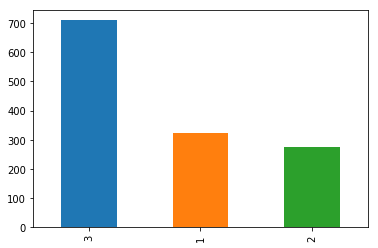

In [70]:
#some explorotory analysis:
#quesiton 1 show difference between regions 

tdata3['Pclass'].value_counts().plot(kind='bar')
tdata3.groupby("Pclass").describe()
#Most of the people were in 3rd class.


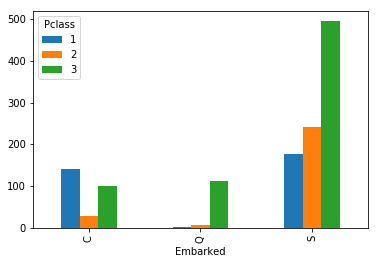

In [76]:
Pep_Region = pd.crosstab(Tdata2["Embarked"],Tdata2["Pclass"])
Pep_Region

plt.show(Pep_Region.plot(kind="bar"))

#see what type of class embarked from which port 

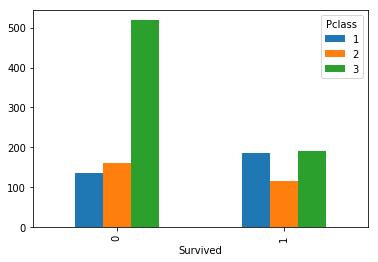

In [78]:
Pep_Region = pd.crosstab(Tdata2["Survived"],Tdata2["Pclass"])
Pep_Region

plt.show(Pep_Region.plot(kind="bar"))

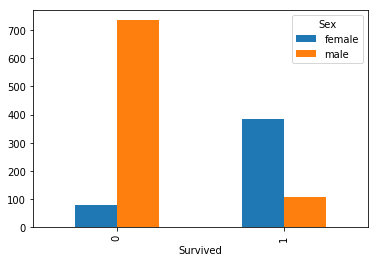

In [79]:
Surived_Sex = pd.crosstab(Tdata2["Survived"],Tdata2["Sex"])
Surived_Sex

plt.show(Surived_Sex.plot(kind="bar"))

In [85]:
tdata3.head()
#embarked C = Cherbourg
#embarked Q = Queenstown
#embarked S  = Southampton
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)

In [53]:
CheckNa = pd.DataFrame(tdata3.isnull().sum(0))
CheckNa

age_mean = tdata3.Age.mean()
tdata3.Age.fillna(age_mean, axis=0, inplace=True)
#replace age n/a with mean 


CheckNa = pd.DataFrame(tdata3.isnull().sum(0))
CheckNa

fare_mean = tdata3.Fare.mean()
tdata3.Fare.fillna(fare_mean, axis=0, inplace=True)


CheckNa = pd.DataFrame(tdata3.isnull().sum(0))
CheckNa


,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_female,0
Sex_male,0
Embarked_C,0
Embarked_Q,0


In [81]:
TdataNP = np.array(tdata3)

In [86]:
DTtrans = pca.fit(TdataNP).transform(TdataNP)

#RUN PCA decompostion


In [89]:
np.set_printoptions(precision=3,suppress=True)
print (DTtrans)



[[-26.384  -6.701   0.229  -0.877]
 [ 38.333   6.395   0.089   0.744]
 [-25.526  -2.729  -0.383   0.833]
 ...
 [-25.638   9.794  -0.213  -0.568]
 [-25.23    1.151  -0.427  -0.577]
 [-10.927   0.473   0.737  -0.384]]


In [90]:

print(pca.explained_variance_ratio_)



[0.942 0.057 0.    0.   ]


In [60]:
meanVals = np.mean(TdataNP, axis=0)
meanRemoved = TdataNP - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)

np.set_printoptions(precision=2,suppress=True,linewidth=100)
print (covMat)

[[   0.24   -0.11   -0.3     0.      0.05    5.86    0.16   -0.16    0.02    0.01   -0.03]
 [  -0.11    0.7    -3.95    0.05    0.01  -24.21   -0.05    0.05   -0.09    0.06    0.04]
 [  -0.3    -3.95  165.98   -2.56   -1.46  114.33   -0.35    0.35    0.4    -0.05   -0.38]
 [   0.      0.05   -2.56    1.09    0.34    8.64    0.05   -0.05   -0.02   -0.01    0.04]
 [   0.05    0.01   -1.46    0.34    0.75    9.92    0.09   -0.09   -0.     -0.03    0.03]
 [   5.86  -24.21  114.33    8.64    9.92 2676.91    4.6    -4.6     5.99   -1.96   -4.1 ]
 [   0.16   -0.05   -0.35    0.05    0.09    4.6     0.23   -0.23    0.01    0.01   -0.03]
 [  -0.16    0.05    0.35   -0.05   -0.09   -4.6    -0.23    0.23   -0.01   -0.01    0.03]
 [   0.02   -0.09    0.4    -0.02   -0.      5.99    0.01   -0.01    0.16   -0.02   -0.14]
 [   0.01    0.06   -0.05   -0.01   -0.03   -1.96    0.01   -0.01   -0.02    0.09   -0.07]
 [  -0.03    0.04   -0.38    0.04    0.03   -4.1    -0.03    0.03   -0.14   -0.07    0.21]

In [63]:
import numpy.linalg as la
eigVals,eigVects = la.eig(np.mat(covMat))

print (eigVals)

[2682.44  160.92    1.19    0.62    0.52    0.4     0.3     0.      0.09    0.1     0.  ]


In [64]:
print (eigVects)


[[-0.    0.    0.   -0.44 -0.24 -0.11  0.09 -0.   -0.85  0.01 -0.  ]
 [ 0.01  0.02 -0.13  0.21  0.43 -0.84  0.1   0.   -0.11  0.17  0.  ]
 [-0.05 -1.   -0.02 -0.    0.01 -0.01  0.   -0.   -0.    0.   -0.  ]
 [-0.    0.02 -0.84  0.3  -0.44 -0.02 -0.04  0.   -0.03  0.    0.  ]
 [-0.    0.01 -0.5  -0.44  0.67  0.29 -0.16  0.   -0.02 -0.05  0.  ]
 [-1.    0.05  0.    0.01  0.   -0.01  0.   -0.   -0.    0.   -0.  ]
 [-0.    0.   -0.07 -0.49 -0.22 -0.24  0.14 -0.    0.36  0.06 -0.71]
 [ 0.   -0.    0.07  0.49  0.22  0.24 -0.14  0.   -0.36 -0.06 -0.71]
 [-0.   -0.    0.05 -0.05 -0.09 -0.03 -0.6  -0.58 -0.    0.54 -0.  ]
 [ 0.   -0.    0.01 -0.02 -0.02 -0.2  -0.13 -0.58  0.02 -0.78 -0.  ]
 [ 0.    0.   -0.07  0.08  0.11  0.22  0.73 -0.58 -0.02  0.24 -0.  ]]


In [66]:
eigValInd = np.argsort(eigVals)  #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]   #reverse
sortedEigVals = eigVals[eigValInd]
print (sortedEigVals)
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
print (varPercentage)

[2682.44  160.92    1.19    0.62    0.52    0.4     0.3     0.1     0.09    0.      0.  ]
[94.23  5.65  0.04  0.02  0.02  0.01  0.01  0.    0.    0.    0.  ]


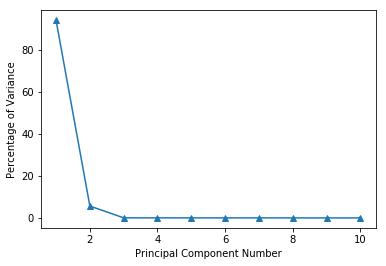

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), varPercentage[:10], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()



In [68]:
topNfeat = 5
topEigValInd = eigValInd[:topNfeat]  #cut off unwanted dimensions
reducedEigVects = eigVects[:,topEigValInd]   #reorganize eig vects largest to smallest
reducedDT = np.dot(meanRemoved, reducedEigVects)    #transform data into new dimensions
print (reducedDT)

[[ 26.38   6.7   -0.23   0.88  -0.03]
 [-38.33  -6.39  -0.09  -0.74  -1.41]
 [ 25.53   2.73   0.38  -0.83  -0.24]
 ...
 [ 25.64  -9.79   0.21   0.57   0.51]
 [ 25.23  -1.15   0.43   0.58   0.46]
 [ 10.93  -0.47  -0.74   0.38   0.55]]


In [69]:
from sklearn.decomposition import PCA, FactorAnalysis
#may have to do factor analysis in order to further explore this data set 